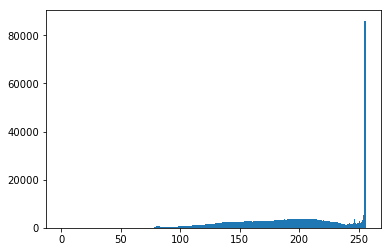

In [2]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('RAH.jpg',0) 
plt.hist(img.ravel(),256,[0,256]) 
plt.show() 

In [3]:
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 

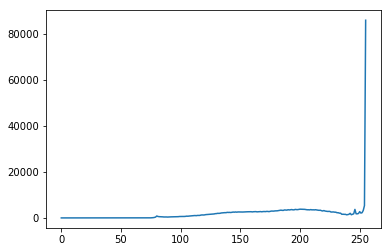

In [4]:
plt.plot(histr) 
plt.show() 

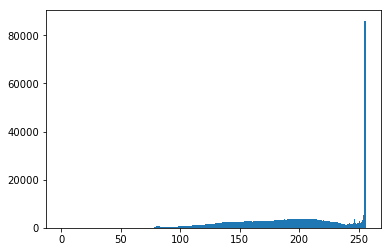

In [5]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

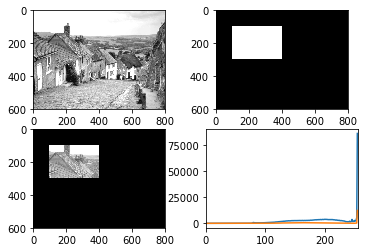

In [6]:
import numpy as np
img = cv2.imread('RAH.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

In [7]:
def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        # no deskewing needed. 
        return img.copy()
    # Calculate skew based on central momemts. 
    skew = m['mu11']/m['mu02']
    # Calculate affine transform to correct skewness. 
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    # Apply affine transform
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img

In [8]:
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
useSignedGradients = True

 
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, useSignedGradients)

In [9]:
# Python gradient calculation 
 
# Read image
im = cv2.imread('RAH.jpg')
im = np.float32(im) / 255.0
 
# Calculate gradient 
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

In [10]:
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

In [11]:
import cv2
import numpy as np
roi = cv2.imread('RAH.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = cv2.imread('rose.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))
cv2.imwrite('res.jpg',res)

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse
parser = argparse.ArgumentParser(description='Code for Histogram Calculation tutorial.')
parser.add_argument('--input', help='Path to input image.', default='RAH.jpg')
args = parser.parse_args()
src = cv.imread(cv.samples.findFile(args.input))
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
bgr_planes = cv.split(src)
histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
accumulate = False
b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(round(b_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(round(b_hist[i])) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(round(g_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(round(g_hist[i])) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(round(r_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(round(r_hist[i])) ),
            ( 0, 0, 255), thickness=2)
cv.imshow('Source image', src)
cv.imshow('calcHist Demo', histImage)
cv.waitKey()